In [2]:
# Basic tools
import pandas as pd   # for data handling (tables)
import numpy as np    # for math stuff (arrays, calculations)

# Visualization tools
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns            # for nicer-looking plots

# ML tools from scikit-learn
from sklearn.datasets import load_iris                 # to load sample flower data
from sklearn.model_selection import train_test_split   # to split data into training/testing
from sklearn.tree import DecisionTreeClassifier, plot_tree  # to build and show decision tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # to evaluate model

In [4]:
from google.colab import files
uploaded = files.upload()

Saving pubg-weapon-stats.csv to pubg-weapon-stats (1).csv


In [9]:
df = pd.read_csv('pubg-weapon-stats.csv')
df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [11]:
# Drop irrelevant columns (name, bullet type, etc.)
X = df.drop(columns=['Weapon Name', 'Weapon Type', 'Bullet Type', 'Fire Mode'])

# Handle missing values
X = X.fillna(0)

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Weapon Type'])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [15]:
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Use inverse transform to get class names of only those labels
target_names = le.inverse_transform(unique_labels)

# Now print the fixed classification report
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))

                         precision    recall  f1-score   support

          Assault Rifle       0.67      1.00      0.80         2
Designed Marksman Rifle       0.33      0.50      0.40         2
                  Melee       1.00      1.00      1.00         1
                 Pistol       0.00      0.00      0.00         3
         Submachine Gun       0.50      1.00      0.67         1

               accuracy                           0.56         9
              macro avg       0.50      0.70      0.57         9
           weighted avg       0.39      0.56      0.45         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


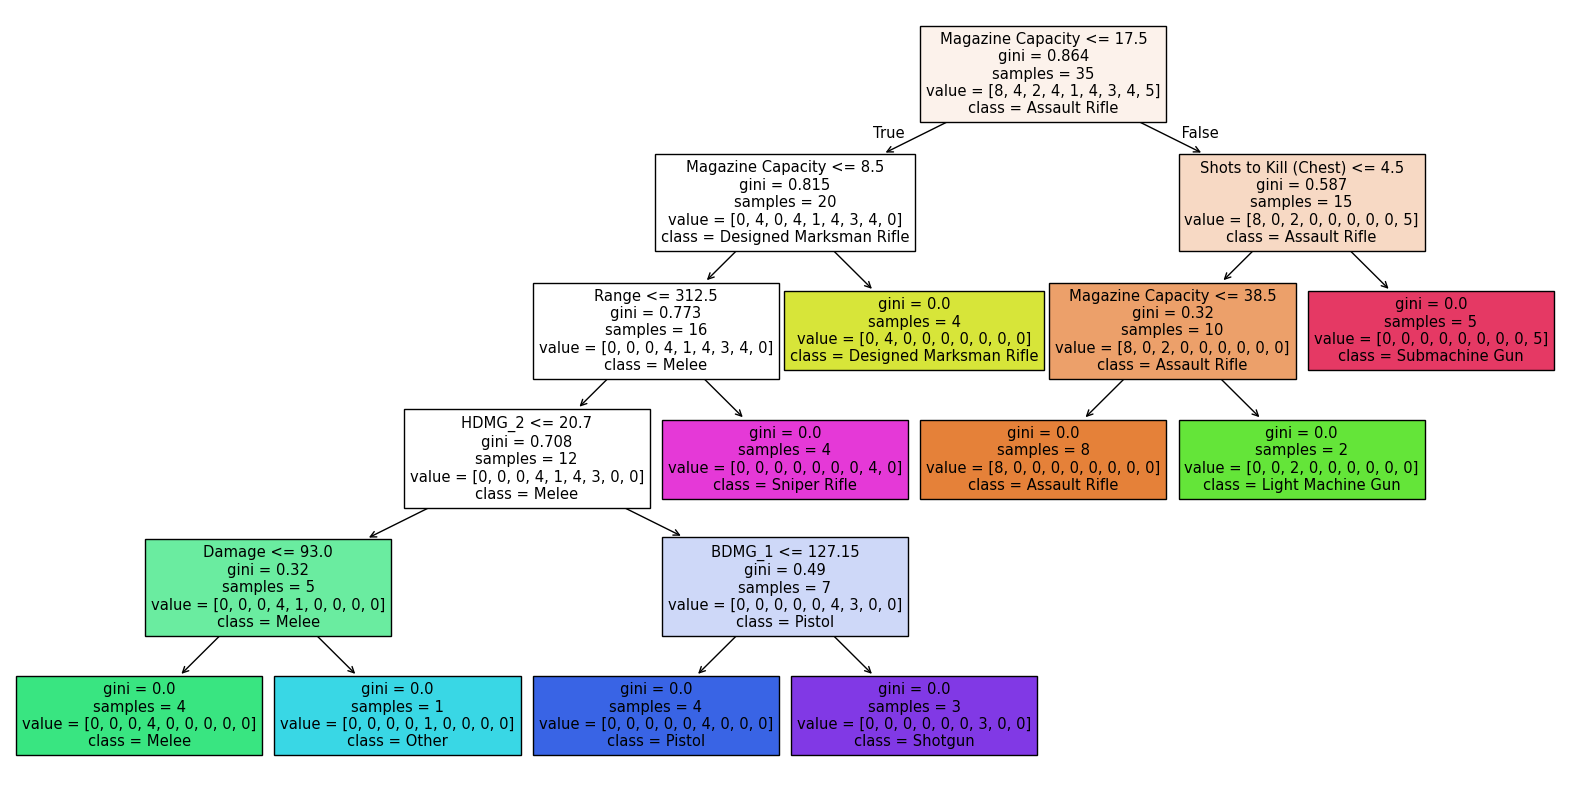

In [16]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()
